# <center> Modelo para American Heart Association </center>

Representantes de la American Heart Association planean ir de puerta en puerta por toda la comunidad, solicitando contribuciones. Por experiencias pasadas, saben que cuando alguien abre la puerta, el 80% de las veces es una mujer y el 20% de las veces es un hombre. También saben que el 70% de las mujeres que abren la puerta hacen una donación, mientras que solo el 40% de los hombres que abren la puerta hacen donaciones. La cantidad de dinero que aportan las mujeres sigue una distribución normal con una media de $20 y una desviación estándar de $3. La cantidad de dinero que aportan los hombres sigue una distribución normal con una media de $10 y una desviación estándar de $2.

## 1. Librerias necesarias

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from random import random

## 2. Entradas conocidas

In [67]:
abre_puerta_mujer = 0.8
abre_puerta_hombre = 1 - abre_puerta_mujer

p_aporte_mujer = 0.7
p_aporte_hombre = 0.4

Distribuciones de la cantidad de dinero que aportan

In [68]:
# [Media, Desviacion estandar]
aporte_mujer = [20, 3]
aporte_hombre = [10, 2]

## 3. Variables de Decisión
En este modelo particular no hacemos uso de estas variables

## 4. Entradas inciertas

In [69]:
# Distribucion de la cantidad de personas que donan
donacion_mujer = norm(aporte_mujer[0], aporte_mujer[1])
donacion_hombre = norm(aporte_hombre[0], aporte_hombre[1])

## 5. Cálculos intermedios

In [70]:
def redondear(x):
  return round(x, 2)

In [71]:
simulaciones = 100000
donaciones = []

for i in range(simulaciones):
  donacion = 0

  if random() < abre_puerta_mujer:
    # Mujer abre la puerta
    if random() < p_aporte_mujer:
      donacion = donacion_mujer.rvs()

  else:
    # Hombre abre la puerta
    if random() < p_aporte_hombre:
      donacion = donacion_hombre.rvs()

  donaciones.append(redondear(donacion))

## 6. Salidas

### ¿Obtenga la función de incertidumbre (histograma) de la contribución que la Heart Association puede esperar recibir cuando alguien abre la puerta?

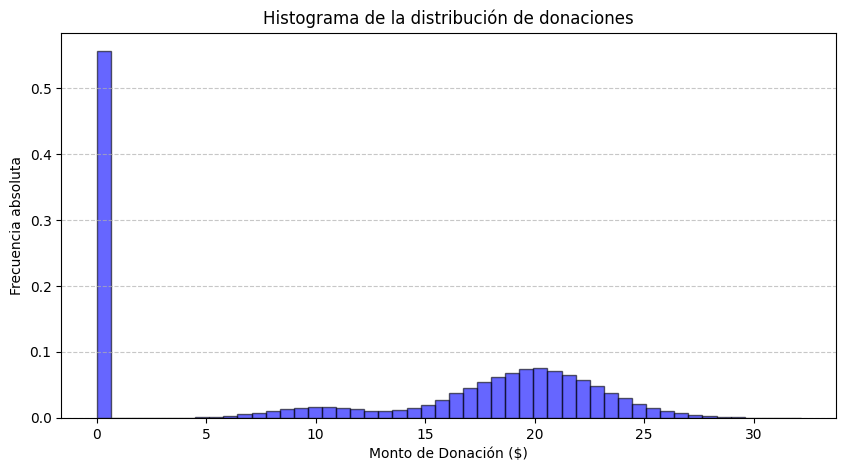

In [73]:
# Generar histograma
plt.figure(figsize=(10, 5))
plt.hist(donaciones, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')

# Etiquetas
plt.xlabel('Monto de Donación ($)')
plt.ylabel('Frecuencia absoluta')
plt.title('Histograma de la distribución de donaciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar histograma
plt.show()

### ¿Cuál es la contribución promedio que la Heart Association puede esperar recibir cuando alguien abre la puerta? 

In [76]:
probabilidad_contribucion = (len([x for x in donaciones if x > 0]) / simulaciones)*100
contribucion_promedio = np.mean(donaciones)
contribucion_desviacion = np.std(donaciones)

print(f'Probabilidad de contribución: {redondear(probabilidad_contribucion)}%')
print(f'Contribución promedio: ${redondear(contribucion_promedio)}')
print(f'Desviación estándar de la contribución: ${redondear(contribucion_desviacion)}')

Probabilidad de contribución: 64.19%
Contribución promedio: $12.03
Desviación estándar de la contribución: $9.66


### Suponga que la Asociación del Corazón planea visitar 300 hogares un sábado determinado. Si nadie está en casa en el 25% de las residencias, ¿cuál es el monto total que la Asociación del Corazón puede esperar recibir en donaciones?

In [78]:
hogares_visitados = 300
nadie_en_casa = 0.25

hogares_abren_puerta = hogares_visitados * (1 - nadie_en_casa)

monto_recaudado = contribucion_promedio * hogares_abren_puerta

print(f'Hogares abren la puerta: {hogares_abren_puerta}')
print(f'Monto recaudado: ${redondear(monto_recaudado)}')

Hogares abren la puerta: 225.0
Monto recaudado: $2707.71


### ¿Cuál es la probabilidad de que la contribución cuando alguien abra la puerta sea superior $21?

In [82]:
probabilidad_mayor_21 = (len([x for x in donaciones if x > 21]) / simulaciones) * 100
print(f'Probabilidad de contribución superior a $21 (P(D>21)): {redondear(probabilidad_mayor_21)}%')

Probabilidad de contribución superior a $21 (P(D>21)): 20.83%
